In [3]:
import pandas as pd

In [4]:
lawinen_set = pd.read_csv('newData/gesamt_set_1960.csv', sep=',')

In [5]:
lawinen_set['ID'] = lawinen_set['ID'].fillna(0)
lawinen_set

,Datum,Intervall,Lawinengrad,Schneehöhe,Schneehöhe_Norm,Niederschlag,Lufttemperatur_7h,Lufttemperatur_7h_Norm,Lufttemperatur_7h_Gew,Lufttemperatur_14h,...,Lawinen_Art,Volumen,ID,meanExpo,meanSlope,stdDevSlope,MinSlope,MaxSlope,Altitude,Avalanche
0,1960-01-02 00:00:00,1959/ 1960,55.0,85.0,105.836576,3.0,-2.8,-22.4,20.0,-0.1,...,NaN,NaN,0.0,275.521754,42.587179,7.489589,3.416216,71.133684,2555.368779,0
1,1960-01-03 00:00:00,1959/ 1960,55.0,84.0,101.357466,16.0,-3.0,-24.0,-11.2,-2.0,...,NaN,NaN,0.0,2.980625,37.066700,6.003100,13.586900,50.025850,1967.563900,0
2,1960-01-04 00:00:00,1959/ 1960,55.0,104.0,122.442973,2.8,-5.0,-40.0,-12.0,-5.4,...,Lockerschneelawine naß,50000,11.0,83.428097,39.152621,7.412260,7.983723,62.527311,2637.086851,1
3,1960-01-05 00:00:00,1959/ 1960,44.0,102.0,121.927531,8.3,-7.0,-56.0,-20.0,-1.0,...,NaN,NaN,0.0,313.357661,41.103233,5.384600,31.226150,54.985633,2040.638533,0
4,1960-01-06 00:00:00,1959/ 1960,44.0,110.0,133.333333,5.3,-6.5,-52.0,-28.0,-10.0,...,NaN,NaN,0.0,232.719192,37.897100,6.448350,12.266050,59.394250,2155.532950,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Schneebrettlawine naß und trocken,gross,6.0,298.144745,41.673113,7.147100,0.000000,65.409112,2735.163400,1
11170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lockerschneelawine trocken,120,13.0,102.339517,36.353125,5.796600,14.436825,53.085600,2179.063375,1
11171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Schneebrettlawine naß,mittel,13.0,102.339517,36.353125,5.796600,14.436825,53.085600,2179.063375,1
11172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Schneebrettlawine trocken,mittel,20.0,271.664767,41.924600,4.659500,33.076000,54.920900,1980.761100,1


<AxesSubplot:>

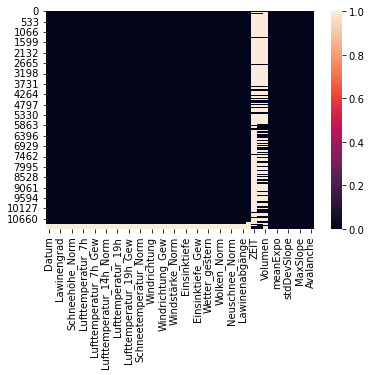

In [6]:
import seaborn as sns

sns.heatmap(lawinen_set.isna())

In [7]:
from sklearn import tree

lawinen_set = lawinen_set.drop(['Datum', 'Intervall', 'ZEIT', ], axis=1)

lawinen_set['Lawinen_Art'] = pd.factorize(lawinen_set['Lawinen_Art'])[0]
lawinen_set['Volumen'] = pd.factorize(lawinen_set['Volumen'])[0]
lawinen_set['Distanz'] = lawinen_set['Distanz'].fillna(0)
lawinen_set.dropna(inplace=True)
lawinen_set

,Lawinengrad,Schneehöhe,Schneehöhe_Norm,Niederschlag,Lufttemperatur_7h,Lufttemperatur_7h_Norm,Lufttemperatur_7h_Gew,Lufttemperatur_14h,Lufttemperatur_14h_Norm,Lufttemperatur_14h_Gew,...,Lawinen_Art,Volumen,ID,meanExpo,meanSlope,stdDevSlope,MinSlope,MaxSlope,Altitude,Avalanche
0,55.0,85.0,105.836576,3.0,-2.8,-22.4,20.0,-0.1,-0.8,10.0,...,-1,-1,0.0,275.521754,42.587179,7.489589,3.416216,71.133684,2555.368779,0
1,55.0,84.0,101.357466,16.0,-3.0,-24.0,-11.2,-2.0,-16.0,-0.4,...,-1,-1,0.0,2.980625,37.066700,6.003100,13.586900,50.025850,1967.563900,0
2,55.0,104.0,122.442973,2.8,-5.0,-40.0,-12.0,-5.4,-43.2,-8.0,...,0,0,11.0,83.428097,39.152621,7.412260,7.983723,62.527311,2637.086851,1
3,44.0,102.0,121.927531,8.3,-7.0,-56.0,-20.0,-1.0,-8.0,-21.6,...,-1,-1,0.0,313.357661,41.103233,5.384600,31.226150,54.985633,2040.638533,0
4,44.0,110.0,133.333333,5.3,-6.5,-52.0,-28.0,-10.0,-80.0,-4.0,...,-1,-1,0.0,232.719192,37.897100,6.448350,12.266050,59.394250,2155.532950,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10941,33.0,175.0,162.359178,16.0,-9.0,-72.0,-36.0,-1.0,-8.0,-40.0,...,2,20,33.0,62.004911,41.474100,8.876500,1.418093,65.950220,2223.063053,1
10942,33.0,155.0,141.483293,8.0,4.0,32.0,-36.0,8.0,64.0,-4.0,...,-1,-1,0.0,62.004911,41.474100,8.876500,1.418093,65.950220,2223.063053,0
10943,33.0,149.0,134.537246,0.0,-1.0,-8.0,16.0,1.0,8.0,32.0,...,-1,-1,0.0,244.234903,36.921650,4.456625,13.363050,52.843300,2423.385125,0
10944,22.0,144.0,129.792371,0.0,-2.0,-16.0,-4.0,-6.0,-48.0,4.0,...,-1,-1,0.0,82.521374,39.486485,8.214154,14.862285,71.692138,1822.645769,0


<AxesSubplot:>

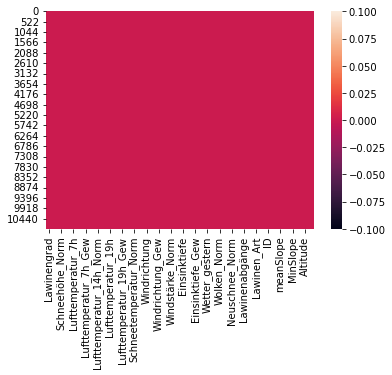

In [8]:
sns.heatmap(lawinen_set.isna())

In [9]:
#sns.pairplot(lawinen_set, hue="Avalanche",palette="bright")

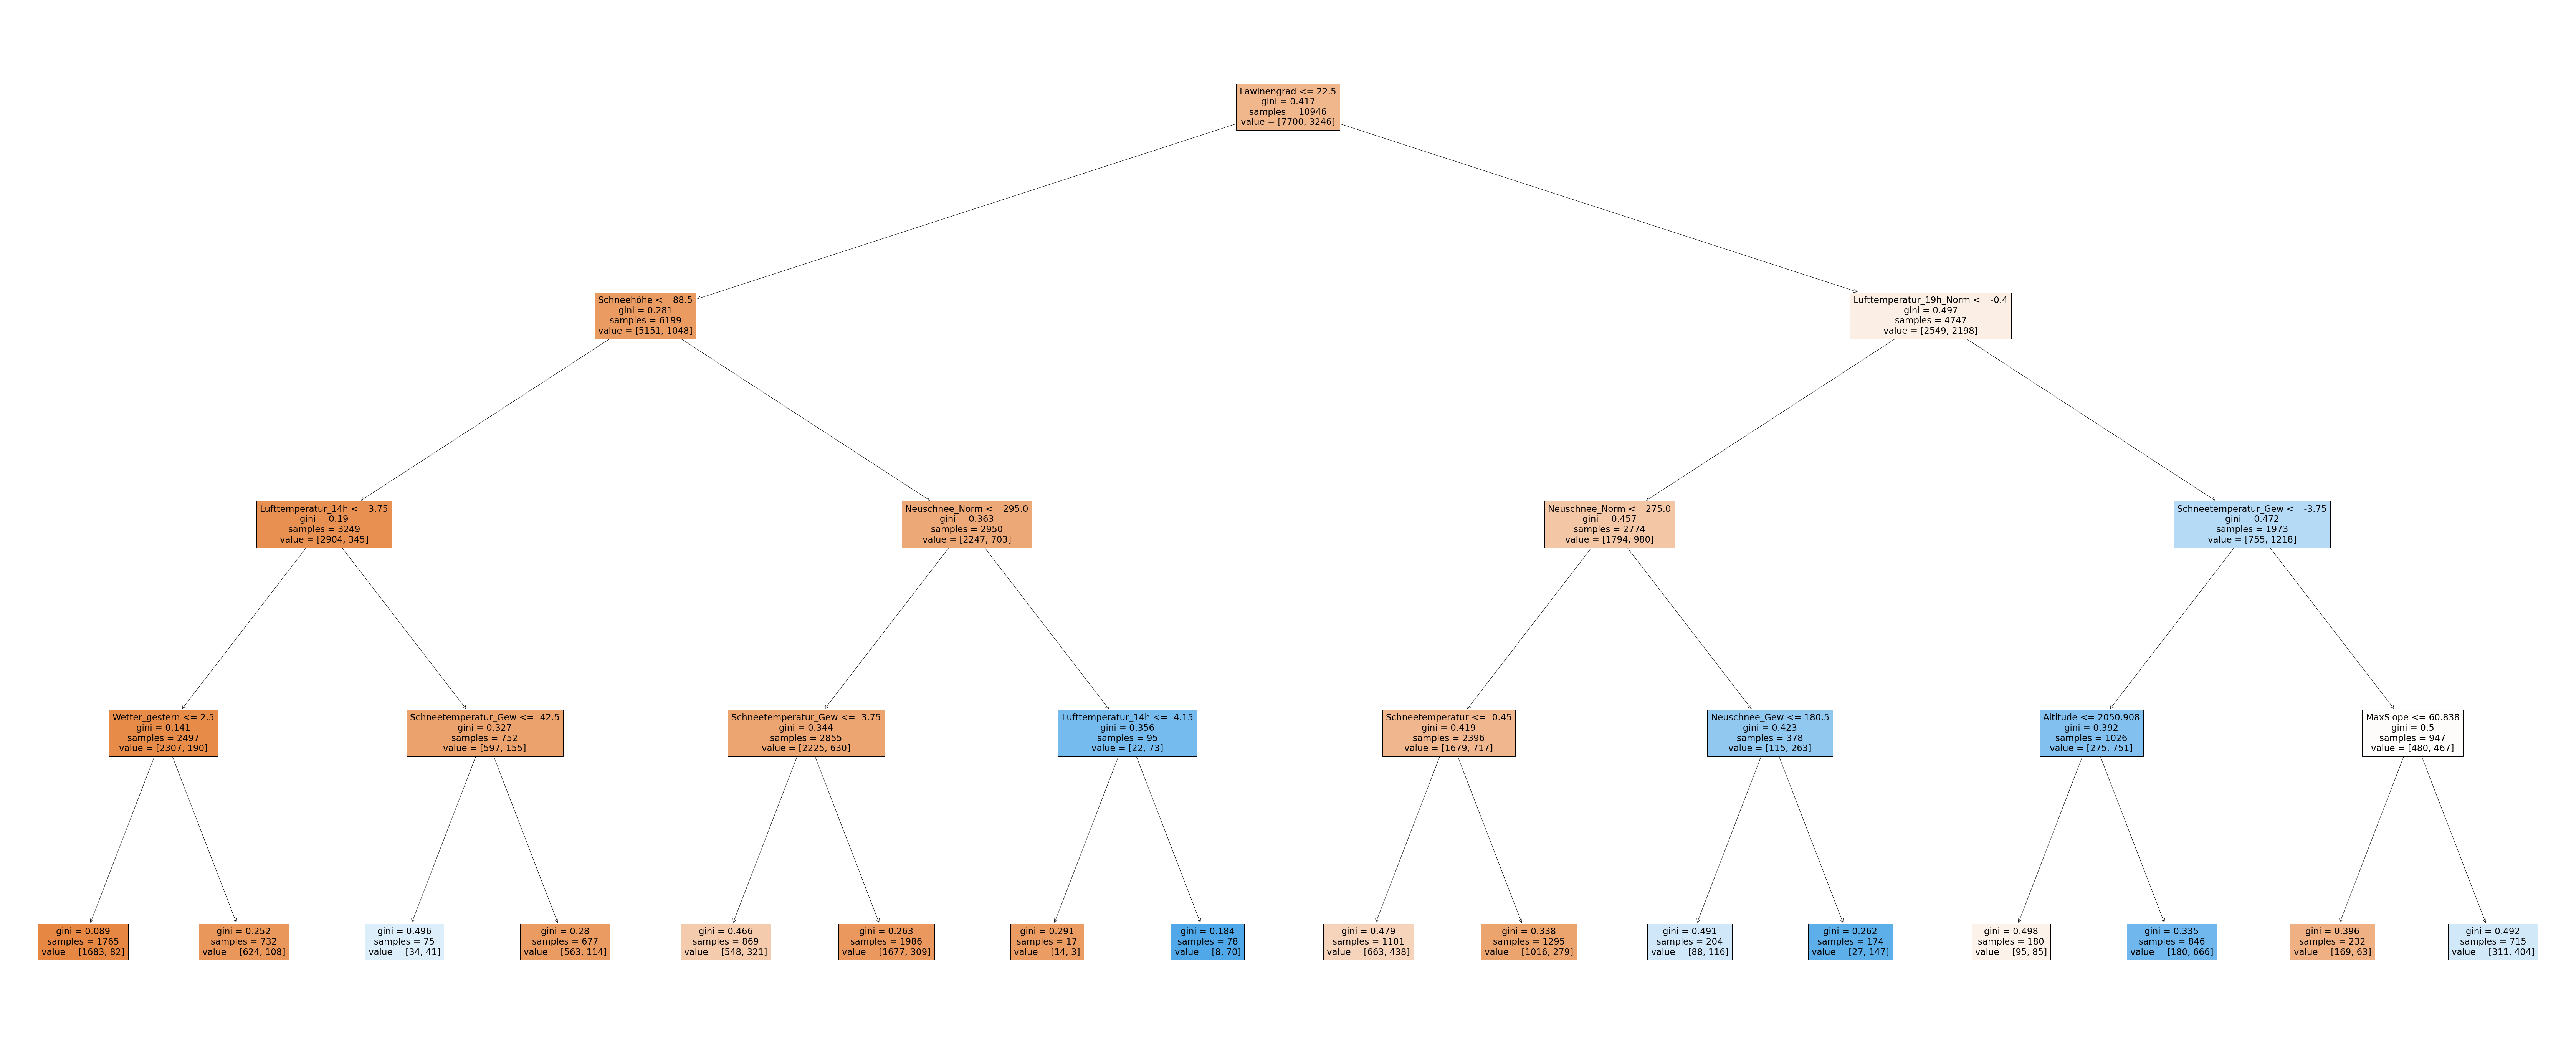

In [10]:
import copy
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

avalanche_set = copy.copy(lawinen_set)

avalanche_set = avalanche_set.drop([ 'Lawinenabgänge', 'ID', 'Volumen', 'Lawinen_Art',], axis=1)
feature_names = avalanche_set.columns.drop('Avalanche')
X = avalanche_set[avalanche_set.columns.drop('Avalanche')]
y = avalanche_set['Avalanche']
dt = tree.DecisionTreeClassifier( max_depth=4)
dt.fit(X, y)


fig, ax = plt.subplots(figsize=(120, 50))
tree.plot_tree(dt, filled=True, ax=ax, feature_names=feature_names)
plt.show()

In [11]:
cross_val_score(dt, X, y, cv=5)

array([0.69452055, 0.71539516, 0.77204203, 0.63864778, 0.61763362])

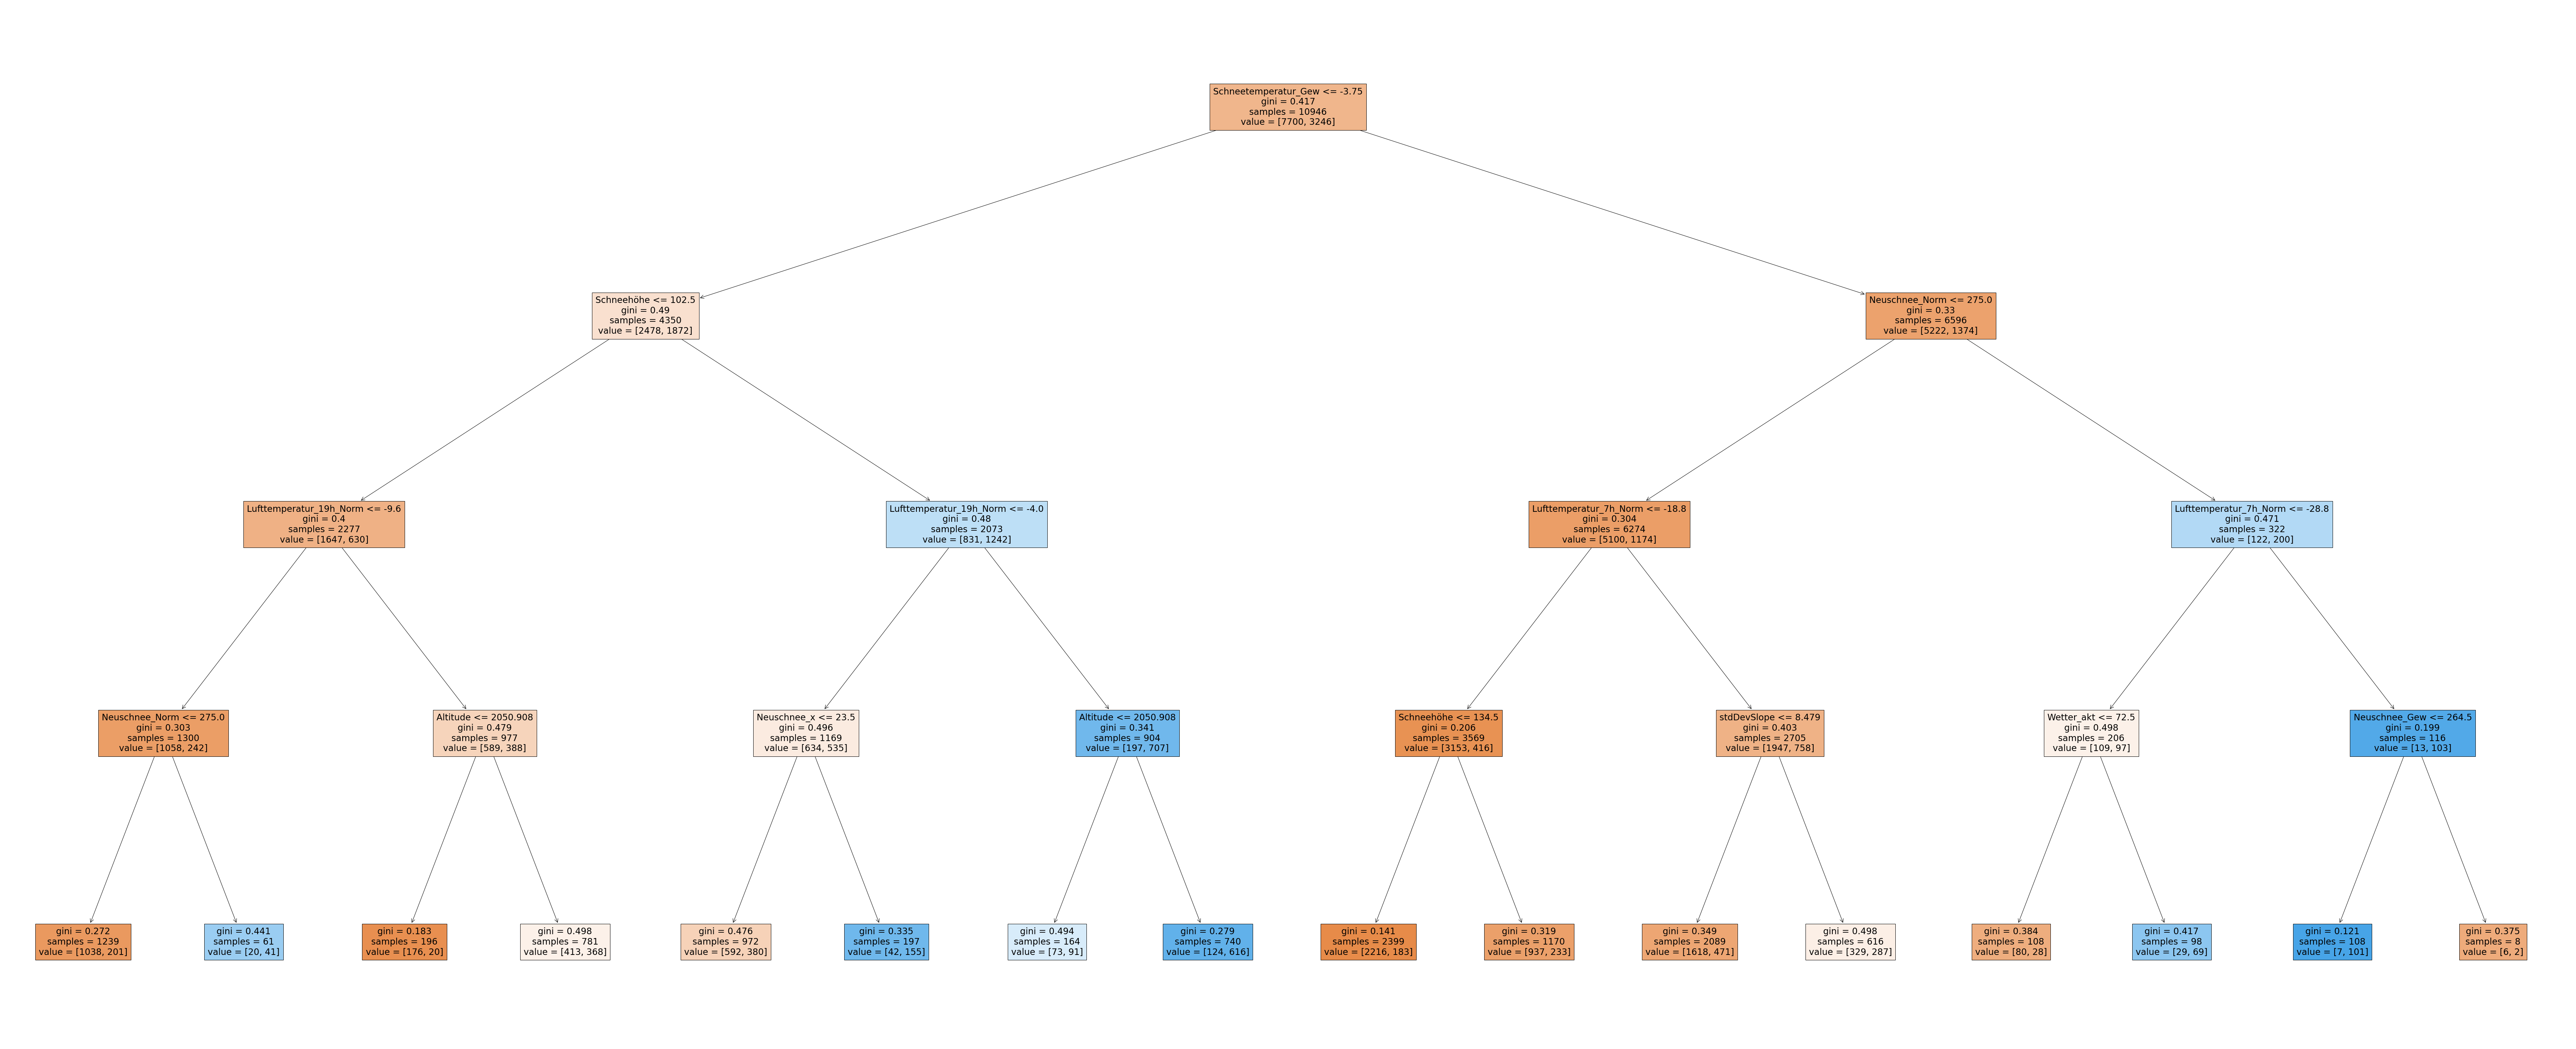

In [12]:
avalanche_set_noLawinengrad = avalanche_set.drop(['Lawinengrad',], axis=1)
feature_names = avalanche_set_noLawinengrad.columns.drop('Avalanche')
X_noLawinengrad = avalanche_set_noLawinengrad[avalanche_set_noLawinengrad.columns.drop('Avalanche')]
y_noLawinengrad = avalanche_set_noLawinengrad['Avalanche']
dt = tree.DecisionTreeClassifier( max_depth=4)
dt.fit(X_noLawinengrad, y_noLawinengrad)


fig, ax = plt.subplots(figsize=(120, 50))
tree.plot_tree(dt, filled=True, ax=ax, feature_names=feature_names)
plt.show()

In [13]:
cross_val_score(dt, X_noLawinengrad, y_noLawinengrad, cv=5)

array([0.71872146, 0.75422567, 0.79214253, 0.61854728, 0.71813614])

In [14]:
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train , X_test , y_train, y_test = train_test_split(X, y, random_state=0)

clf = make_pipeline(StandardScaler(), svm.SVC())
#clf = svm.SVC()
clf.fit(X_train,y_train)

#gram_test = np.dot(X_test, X_train.T)
pred = clf.predict(X_test)

print(accuracy_score(y_test, pred), cross_val_score(clf, X, y, cv=5))

0.8140299598100109 [0.71461187 0.77067154 0.78254911 0.73503883 0.73366834]


In [15]:

X_train , X_test , y_train, y_test = train_test_split(X_noLawinengrad, y_noLawinengrad, random_state=0)

clf = make_pipeline(StandardScaler(), svm.SVC())
#clf = svm.SVC()
clf.fit(X_train,y_train)

#gram_test = np.dot(X_test, X_train.T)
pred = clf.predict(X_test)

print(accuracy_score(y_test, pred), cross_val_score(clf, X, y, cv=5))

0.8005115089514067 [0.71461187 0.77067154 0.78254911 0.73503883 0.73366834]
